
## EJERCICIO PREPARACIÓN DE DATOS - CALIDAD DEL AIRE

1. Cargar los datos

2. Seleccionar variables

3. Descripción estadística

4. Limpieza de atípico

5. Limpieza de nulos

6. Transformación ded variables categóricas a numéricas

In [ ]:
# Librerías a importar

import pandas as pd # manipular conjuntos de datos (dataframe)

import numpy as np # operaciones matrices

import matplotlib.pyplot as plt # gráficas

data = pd.read_excel("prediccionCalidadAire.xlsx",sheet_name=0)

data.head()

data['outlook']=data['outlook'].astype('category')

data['Alert']=data['Alert'].astype('category')

data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   outlook      60 non-null     category
 1   temperature  60 non-null     int64   
 2   humidity     60 non-null     int64   
 3   PM25         60 non-null     int64   
 4   Alert        60 non-null     category
dtypes: category(2), int64(3)
memory usage: 1.8 KB


,temperature,humidity,PM25
count,60.000000,60.000000,60.000000
mean,65.616667,79.483333,170.366667
std,30.747243,14.732061,107.437166
min,-150.000000,-1.000000,-100.000000
25%,65.000000,70.000000,48.750000
50%,70.000000,80.000000,200.000000
75%,71.250000,91.000000,253.000000
max,85.000000,96.000000,298.000000


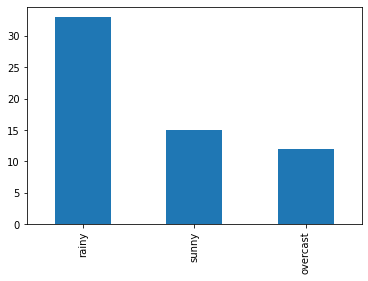

In [ ]:
data['outlook'].value_counts().plot(kind='bar')

data.describe()

In [ ]:
data.temperature[data["temperature"]<=-20]=None
data.humidity[data["humidity"]<=0]=None
data.PM25[data["PM25"]<=0]=None

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   outlook      60 non-null     category
 1   temperature  59 non-null     float64 
 2   humidity     59 non-null     float64 
 3   PM25         59 non-null     float64 
 4   Alert        60 non-null     category
dtypes: category(2), float64(3)
memory usage: 1.8 KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
from sklearn.impute import SimpleImputer

ImpNumeros = SimpleImputer(missing_values=np.nan, strategy='mean')

data[['temperature','humidity','PM25']] = ImpNumeros.fit_transform(data[['temperature','humidity','PM25']])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   outlook      60 non-null     category
 1   temperature  60 non-null     float64 
 2   humidity     60 non-null     float64 
 3   PM25         60 non-null     float64 
 4   Alert        60 non-null     category
dtypes: category(2), float64(3)
memory usage: 1.8 KB


In [ ]:
dummies = pd.get_dummies(data['outlook'])

data = data.drop('outlook', axis=1) #Elimino la columna original

data = data.join(dummies) #Adiciono las dummies

data.head()

,temperature,humidity,PM25,Alert,overcast,rainy,sunny
0,65.0,70.0,245.0,Yes,0,1,0
1,71.0,91.0,253.0,Yes,0,1,0
2,65.0,70.0,298.0,Yes,0,1,0
3,71.0,91.0,278.0,Yes,0,1,0
4,65.0,70.0,243.0,Yes,1,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

data["Alert"]=labelencoder.fit_transform(data["Alert"])

data.head()

,temperature,humidity,PM25,Alert,overcast,rainy,sunny
0,65.0,70.0,245.0,1,0,1,0
1,71.0,91.0,253.0,1,0,1,0
2,65.0,70.0,298.0,1,0,1,0
3,71.0,91.0,278.0,1,0,1,0
4,65.0,70.0,243.0,1,1,0,0


In [ ]:
data.to_excel('./ResultadoPrediccionCalidadAire.xlsx',sheet_name='Datos')